In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('cap_supply.csv')

In [3]:
df.head()

,Quarter,Supply
0,2021-01,100800
1,2021-02,98564
2,2021-03,95345
3,2021-04,124679
4,2021-05,128654


In [4]:
df.tail()

,Quarter,Supply
22,2022-11,124534
23,2022-12,185348
24,2023-01,213567
25,2023-02,127240
26,2023-03,117670


In [5]:
## Cleaning up the data
df.columns=["Quarter","Supply"]
df.head()

,Quarter,Supply
0,2021-01,100800
1,2021-02,98564
2,2021-03,95345
3,2021-04,124679
4,2021-05,128654


In [6]:
# Convert Month into Datetime
df['Quarter']=pd.to_datetime(df['Quarter'])

In [7]:
df.head()

,Quarter,Supply
0,2021-01-01,100800
1,2021-02-01,98564
2,2021-03-01,95345
3,2021-04-01,124679
4,2021-05-01,128654


In [8]:
df.set_index('Quarter',inplace=True)

In [9]:
df.head()

,Supply
Quarter,
2021-01-01,100800
2021-02-01,98564
2021-03-01,95345
2021-04-01,124679
2021-05-01,128654


In [10]:
df.describe()

,Supply
count,27.000000
mean,116704.851852
std,29270.332038
min,59473.000000
25%,101626.500000
50%,115670.000000
75%,125959.500000
max,213567.000000


<Axes: xlabel='Quarter'>

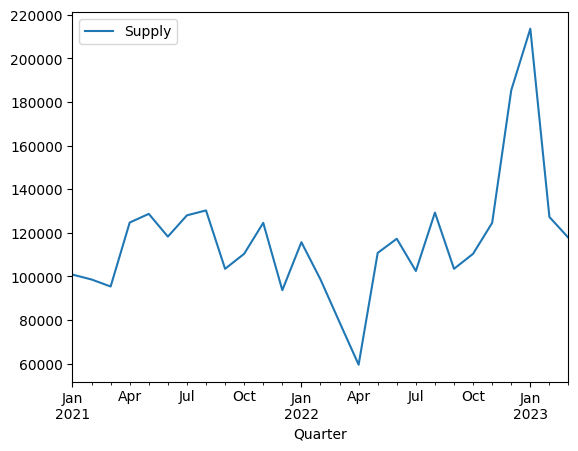

In [11]:
df.plot()

In [12]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [13]:
test_result=adfuller(df['Supply'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [15]:
adfuller_test(df['Supply'])

ADF Test Statistic : -3.214660682396536
p-value : 0.019151591265509013
#Lags Used : 8
Number of Observations Used : 18
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [16]:
df['Supply First Difference'] = df['Supply'] - df['Supply'].shift(1)

In [17]:
df['Supply'].shift(1)

Quarter
2021-01-01         NaN
2021-02-01    100800.0
2021-03-01     98564.0
2021-04-01     95345.0
2021-05-01    124679.0
2021-06-01    128654.0
2021-07-01    118230.0
2021-08-01    127983.0
2021-09-01    130240.0
2021-10-01    103456.0
2021-11-01    110345.0
2021-12-01    124534.0
2022-01-01     93650.0
2022-02-01    115670.0
2022-03-01     98587.0
2022-04-01     78954.0
2022-05-01     59473.0
2022-06-01    110764.0
2022-07-01    117240.0
2022-08-01    102453.0
2022-09-01    129250.0
2022-10-01    103456.0
2022-11-01    110345.0
2022-12-01    124534.0
2023-01-01    185348.0
2023-02-01    213567.0
2023-03-01    127240.0
Name: Supply, dtype: float64

In [18]:
df['Seasonal First Difference']=df['Supply']-df['Supply'].shift(12)

In [19]:
df.head(14)

,Supply,Supply First Difference,Seasonal First Difference
Quarter,,,
2021-01-01,100800,NaN,NaN
2021-02-01,98564,-2236.0,NaN
2021-03-01,95345,-3219.0,NaN
2021-04-01,124679,29334.0,NaN
2021-05-01,128654,3975.0,NaN
2021-06-01,118230,-10424.0,NaN
2021-07-01,127983,9753.0,NaN
2021-08-01,130240,2257.0,NaN
2021-09-01,103456,-26784.0,NaN


In [20]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.6870387067740928
p-value : 0.43780259329223686
#Lags Used : 0
Number of Observations Used : 14
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='Quarter'>

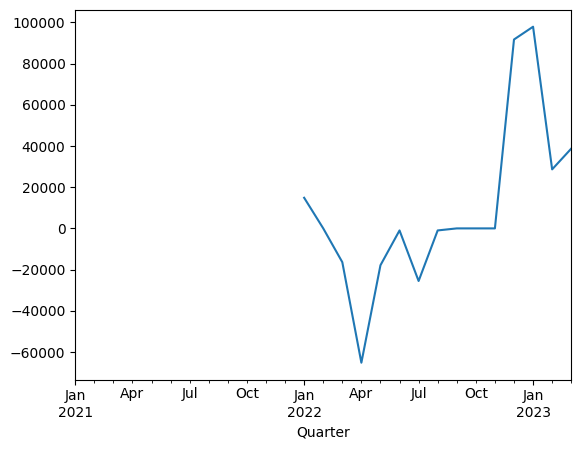

In [21]:
df['Seasonal First Difference'].plot()

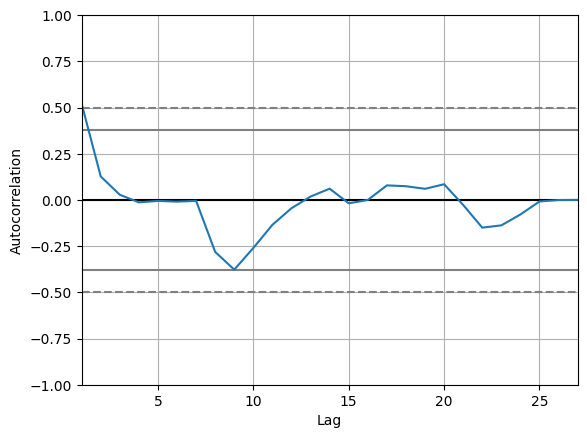

In [22]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Supply'])
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
import statsmodels.api as sm

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


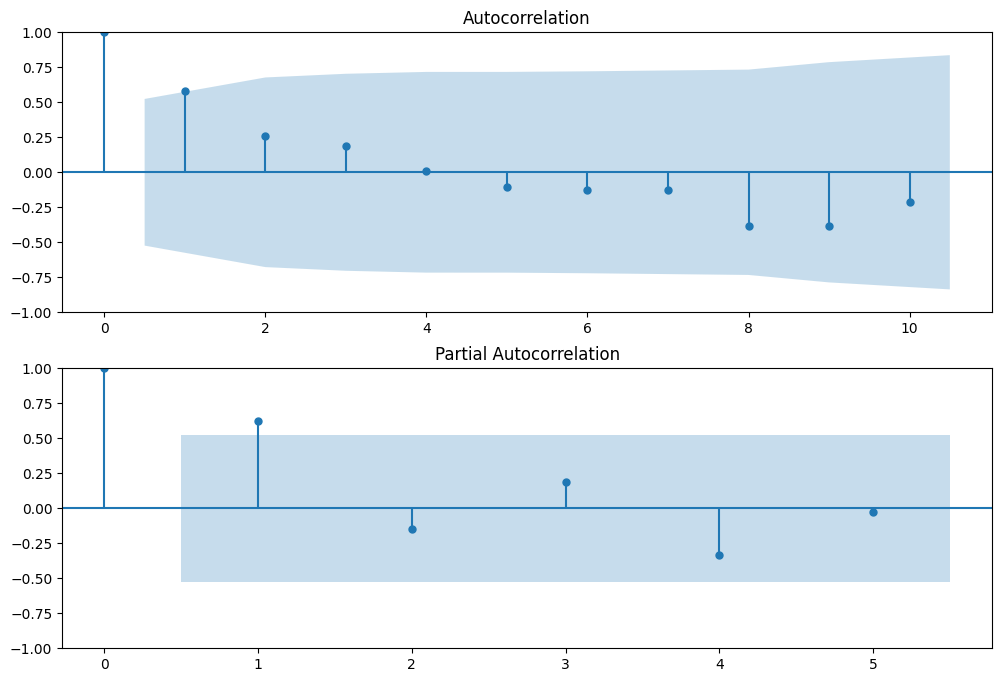

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=5,ax=ax2)

In [26]:
import statsmodels.api as sm

In [27]:
model=sm.tsa.statespace.SARIMAX(df['Supply'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


<Axes: xlabel='Quarter'>

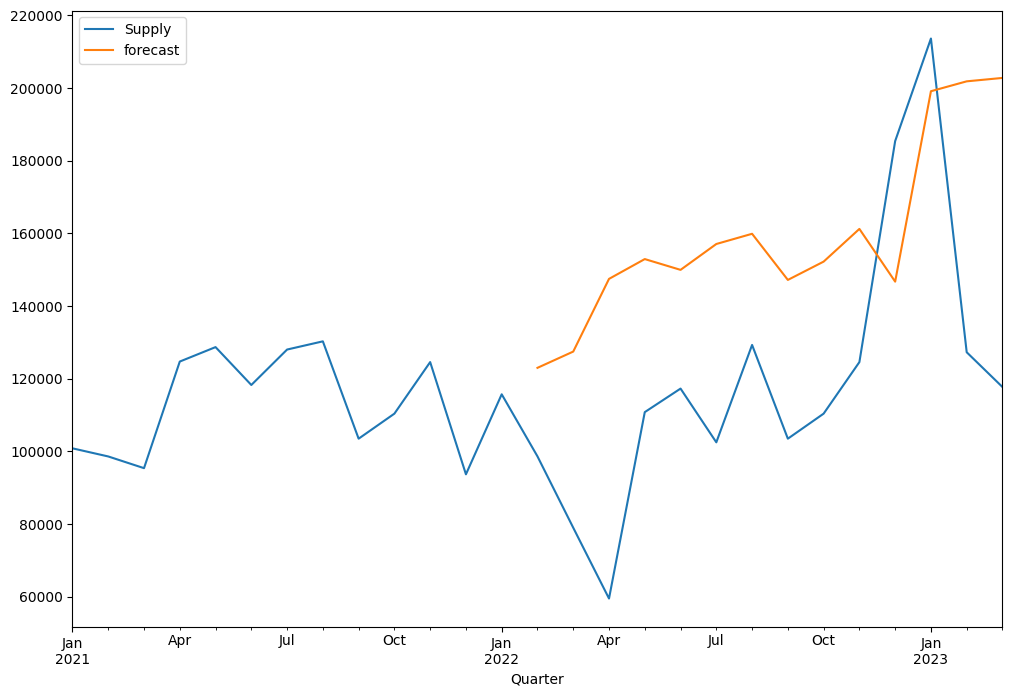

In [28]:
df['forecast']=results.predict(start=13,end=28,dynamic=True)
df[['Supply','forecast']].plot(figsize=(12,8))

In [29]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [30]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [31]:
future_datest_df.tail()

,Supply,Supply First Difference,Seasonal First Difference,forecast
2024-10-01,NaN,NaN,NaN,NaN
2024-11-01,NaN,NaN,NaN,NaN
2024-12-01,NaN,NaN,NaN,NaN
2025-01-01,NaN,NaN,NaN,NaN
2025-02-01,NaN,NaN,NaN,NaN


In [32]:
future_df=pd.concat([df,future_datest_df])

# Prediction forecasting - Capsicum Supply

C:\Users\Futuremind\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: >

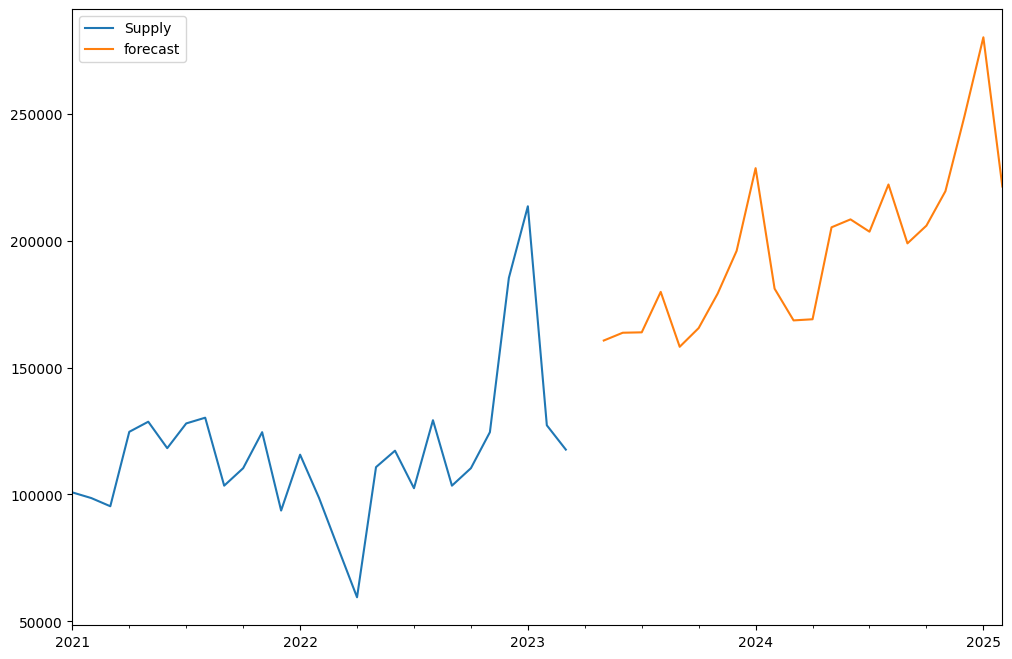

In [33]:
future_df['forecast'] = results.predict(start = 28, end = 50, dynamic= True)  
future_df[['Supply', 'forecast']].plot(figsize=(12, 8)) 